In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [3]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [4]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

In [5]:
config_file = "../configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])

In [6]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

In [7]:
def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

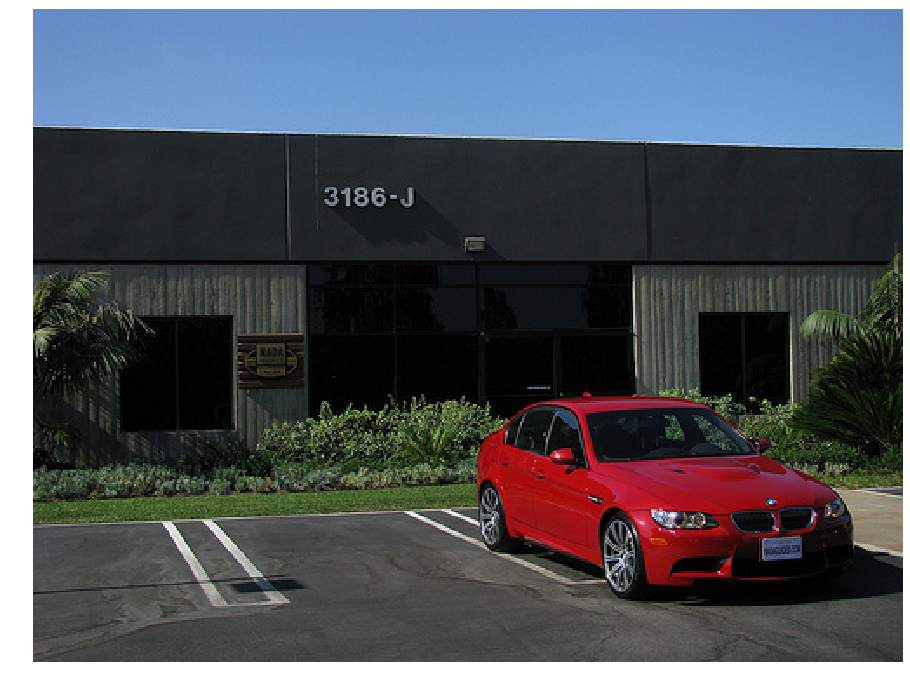

In [8]:
import cv2 as cv

image = cv.imread("car4.jpg", cv.IMREAD_COLOR)

imshow(image)

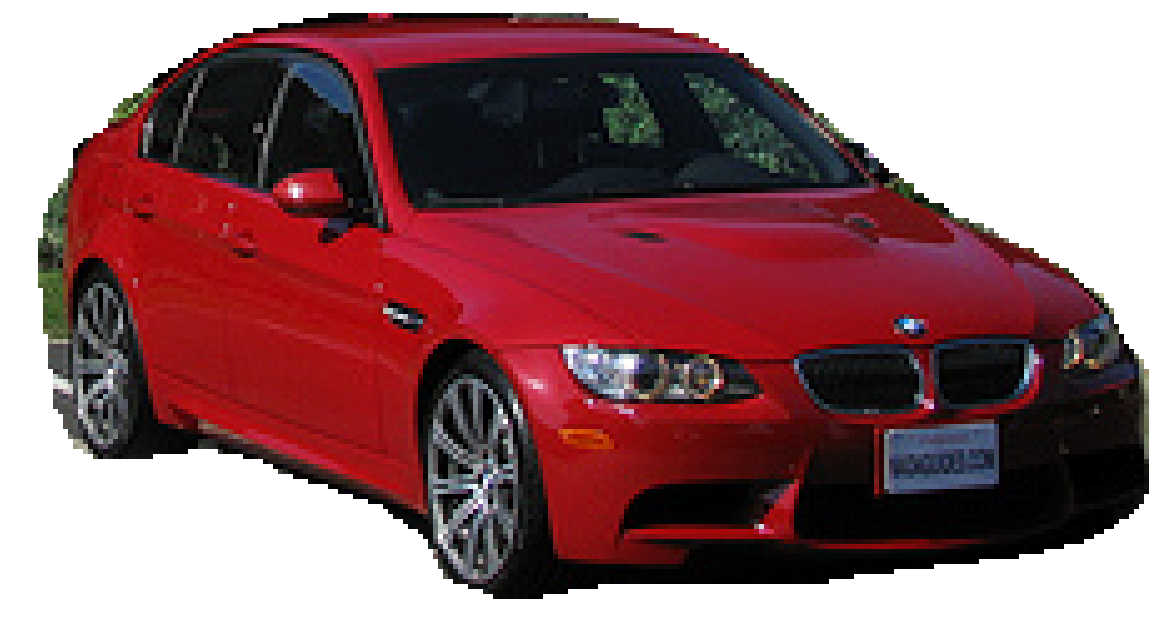

In [9]:
predictions,_ = coco_demo.run_on_opencv_image(image)
imshow(predictions)

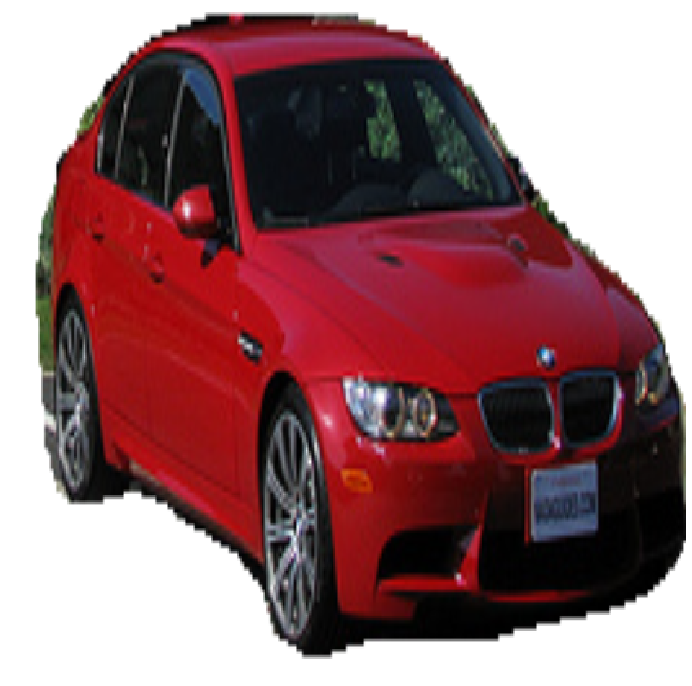

In [10]:
img = cv.resize(predictions,(400,400))
imshow(img)

In [11]:
import h5py
import matplotlib.pyplot as plt
import sys
import time
import numpy as np
import math
import pandas as pd
from PIL import Image, ImageOps, ImageFilter
import os
import cv2

import glob

In [12]:
# path = os.getcwd()
path = "/home/guest/car_data"
print(path)

/home/guest/car_data


In [13]:
file_train = glob.glob(path+"/cars_train/*.jpg")
file_test = glob.glob(path+"/cars_test/*.jpg")

In [14]:
print(len(file_train))
print(len(file_test))

8144
8041


In [15]:
file_all = file_train+file_test

In [16]:
print(len(file_all))

16185


In [17]:
file_all[:10]

['/home/guest/car_data/cars_train/03510.jpg',
 '/home/guest/car_data/cars_train/05525.jpg',
 '/home/guest/car_data/cars_train/00924.jpg',
 '/home/guest/car_data/cars_train/05180.jpg',
 '/home/guest/car_data/cars_train/01538.jpg',
 '/home/guest/car_data/cars_train/00410.jpg',
 '/home/guest/car_data/cars_train/02390.jpg',
 '/home/guest/car_data/cars_train/04440.jpg',
 '/home/guest/car_data/cars_train/03083.jpg',
 '/home/guest/car_data/cars_train/00105.jpg']

In [18]:
def creatH5(data,sep,imgSize):
    
    imageName = data
    #label = np.array([data[i][1] for i in range(len(t))])
    #print(len(label[0]))
    leng = len(imageName)
    ALL = False
    if 'all' in format(sep):
        print("ALL")
        ALL = True
        sep = leng
    package = int(leng/sep)
    print("Total ",package,"pkgs")
    for i in range(package):
        partimageName = 0
        partlabel = 0    
        if ALL:
            partimageName = imageName
            #partlabel = label
        else:
            if i == (package-1):
                partimageName = imageName[sep*(i+1):]
                partlabel = label[sep*(i+1):]
            else:
                partimageName = imageName[sep*i:sep*(i+1)]
                partlabel = label[sep*i:sep*(i+1)]
        print("Image",len(partimageName))
        #print("Label",len(partlabel))
        filename = "CP_all_data_"+format(sep)+"v"+format(i+1)
        data2h5(partimageName, filename, imgSize)

In [19]:
def data2h5(imgname, filename, imgSize):
    
    lengthof = len(imgname)
    ff = h5py.File(filename+".h5", mode='w')
    
    train_shape = (len(imgname), imgsize[0], imgsize[1] , 3)
    ff.create_dataset("train_img", train_shape, np.uint8)
    #ff.create_dataset("train_labels", (len(leb),len(leb[0])), np.uint8)
    #print(len(leb[0]))
    #ff["train_labels"][...] = leb
    #print(len(leb))
    for k in range(lengthof):
        if k % 100 == 0 and k > 1:
            print ('Load data: {}/{}'.format(k, lengthof))

        #print(path+"/train/"+format(imgname[k])+'.png')
        img = cv2.imread(imgname[k], cv2.IMREAD_COLOR)
        img,_ = coco_demo.run_on_opencv_image(img)
        
        img = cv2.resize(img, imgSize, interpolation=cv2.INTER_CUBIC)# resize to (128,128)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2 load images as BGR, convert it to RGB
        ff["train_img"][k, ...] = np.expand_dims(img, axis=0)
        #ff["train_labels"][k] = leb[k] 
    ff.close()

In [33]:
imgsize = (400,400)
creatH5(file_all,'all',imgsize)

ALL
Total  1 pkgs
Image 16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 100/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 200/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 300/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 400/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 500/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 600/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find

Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 4000/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 4100/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 4200/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 4300/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 4400/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no 

Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 8000/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 8100/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 8200/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 8300/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 8400/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no 

Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 12000/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 12100/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 12200/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 12300/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 12400/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 12500/16185
Find no car !
Find no 

Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Load data: 16100/16185
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !
Find no car !


In [37]:
file = h5py.File("R2_RE256_all_data_14072v1.h5", 'a')

In [38]:
print(file['train_img'][:,:,:].shape)

(14072, 256, 256, 3)


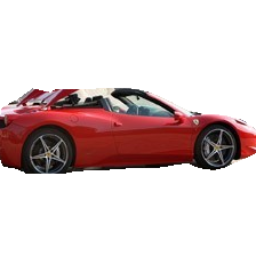

In [39]:
Image.fromarray(file['train_img'][1837,:,:])

In [40]:
import torch
import torchvision.utils as vutils
import matplotlib.pyplot as plt

In [41]:
tran = np.einsum('klij->kjli', file['train_img'][500:564,:,:])
print(tran.shape)
grid = torch.from_numpy(tran)
print(grid.shape)

(64, 3, 256, 256)
torch.Size([64, 3, 256, 256])


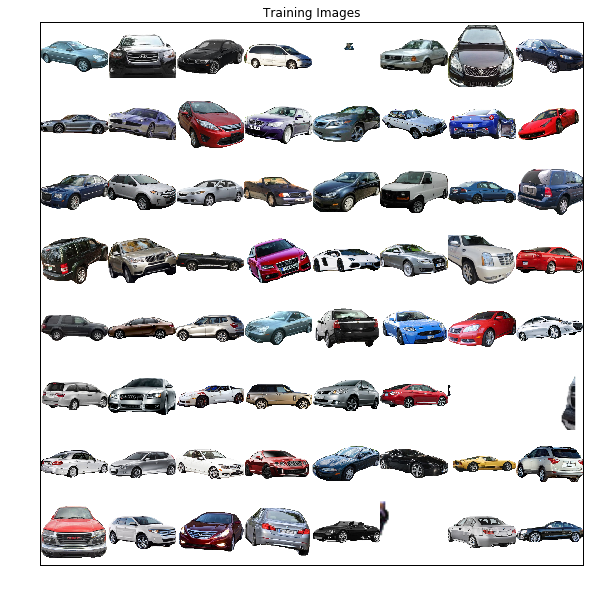

In [42]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(grid, padding=2),(1,2,0)))

In [49]:
count = 0
edges_shape = (len(file['train_img']), 256, 256 , 3)
#file.create_dataset("edges", edges_shape, np.uint8)
for k in range(len(file['train_img'])):
    edges = cv2.Canny(file['train_img'][k], 200, 256)
    newEdges = cv2.bitwise_not(edges)
    newEdges = cv2.cvtColor(newEdges, cv2.COLOR_GRAY2BGR)
    file["edges"][k, ...] = np.expand_dims(newEdges, axis=0)
    count = count + 1
    if count%1000 == 0:
        print(str(count) + "finished")

1000finished
2000finished
3000finished
4000finished
5000finished
6000finished
7000finished
8000finished
9000finished
10000finished
11000finished
12000finished
13000finished
14000finished


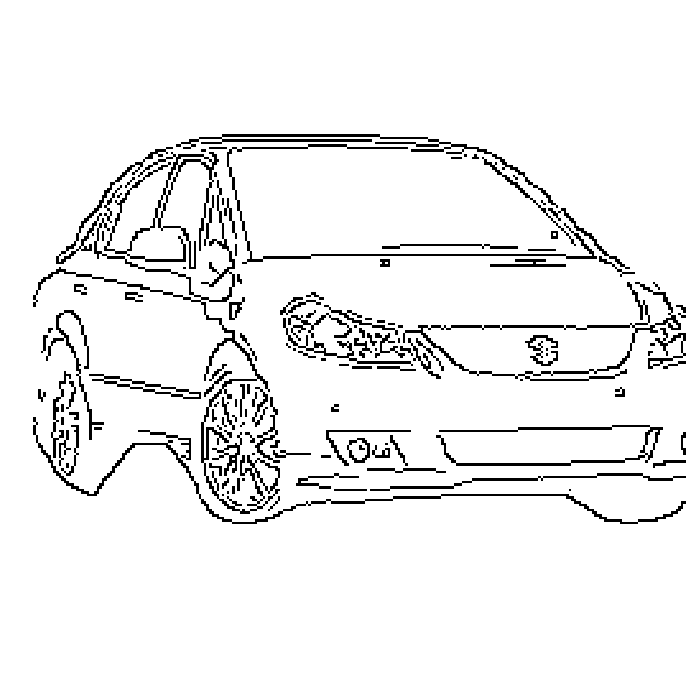

In [53]:
imshow(file['edges'][1110])